In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df =  pd.read_csv('/Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [15]:
df.drop(columns=['RowNumber','CustomerId' ,'Surname'], inplace = True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Encoding Geography and Gender **





In [18]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [21]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


**Scalling **

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Building sequential model using keras**





In [45]:
model = Sequential()


# Now adding layers to Neural Network

#Code for first hidden layer
#Dense creates a dense layer
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu', input_dim=11))

#Code for output layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [61]:
history = model.fit(X_trained_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8878 - loss: 0.2929 - val_accuracy: 0.8519 - val_loss: 0.3635
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8807 - loss: 0.2993 - val_accuracy: 0.8531 - val_loss: 0.3617
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.3021 - val_accuracy: 0.8544 - val_loss: 0.3616
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.2997 - val_accuracy: 0.8519 - val_loss: 0.3617
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.2990 - val_accuracy: 0.8537 - val_loss: 0.3632
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.3008 - val_accuracy: 0.8556 - val_loss: 0.3614
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.2999 - val_accuracy: 0.8544 - val_loss: 0.3623
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.2970 - val_accu

In [62]:
history

In [63]:
model.layers[0].get_weights()

[array([[ 0.00576042,  0.13501516,  0.09662174,  0.12661257,  0.16104102,
         -0.0136508 , -0.04134494,  0.7710812 , -0.34546116,  0.2903517 ,
         -0.00718525],
        [-0.98330045, -0.42028862,  0.9011227 , -0.6194912 , -0.31273085,
          0.01324922, -0.33398804, -0.06488688, -0.5331859 ,  0.05885587,
         -0.10270587],
        [ 0.06792322, -0.05617122,  0.2698397 , -0.15922716,  0.27376613,
          0.3113405 , -0.4962779 ,  0.43382666,  0.20413098,  0.7165691 ,
         -0.2223095 ],
        [ 0.18719704,  0.14220604, -0.11969008,  0.06270511,  0.74397004,
          0.8922212 ,  0.1630334 , -0.37120345, -0.41477618, -0.8676808 ,
         -0.88117576],
        [ 0.14101179,  1.40669   ,  0.06452318,  0.68119895,  1.3844882 ,
          1.1548932 ,  0.3193547 , -0.3846854 , -0.48833326,  0.19039415,
          0.6919688 ],
        [-0.06737903, -0.27287105,  0.24580517, -0.46075872,  0.63429296,
         -0.26337594,  0.17547756,  0.38562593,  0.14136885, -0.3882600

In [64]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [65]:
y_pred = np.where(y_log>0.5,1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.854

In [68]:
history.history

{'accuracy': [0.8792187571525574,
  0.8778125047683716,
  0.8771874904632568,
  0.8774999976158142,
  0.8778125047683716,
  0.8771874904632568,
  0.8770312666893005,
  0.8778125047683716,
  0.8767187595367432,
  0.8784375190734863,
  0.8768749833106995,
  0.878125011920929,
  0.8768749833106995,
  0.8793749809265137,
  0.8774999976158142,
  0.8792187571525574,
  0.8784375190734863,
  0.8767187595367432,
  0.8765624761581421,
  0.87890625,
  0.8764062523841858,
  0.8795312643051147,
  0.8770312666893005,
  0.8778125047683716,
  0.8771874904632568,
  0.8778125047683716,
  0.8774999976158142,
  0.8784375190734863,
  0.8768749833106995,
  0.8782812356948853,
  0.8773437738418579,
  0.8764062523841858,
  0.8790624737739563,
  0.8776562213897705,
  0.8785937428474426,
  0.8784375190734863,
  0.8771874904632568,
  0.878125011920929,
  0.8778125047683716,
  0.8764062523841858,
  0.8784375190734863,
  0.8784375190734863,
  0.8770312666893005,
  0.8779687285423279,
  0.8776562213897705,
  0.8770

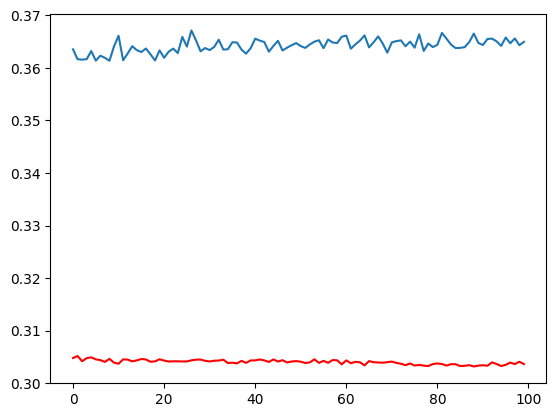

In [67]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])

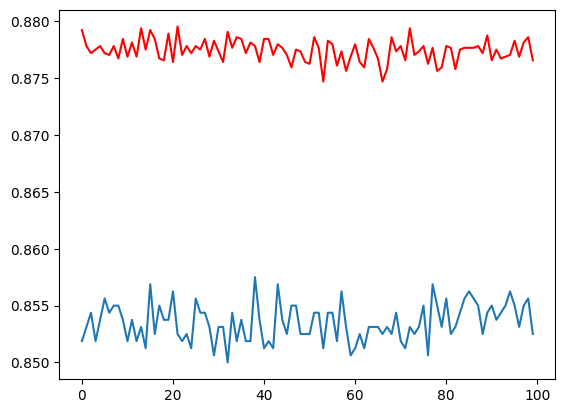

In [69]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])